## Перекрестная проверка моделей

Требуется оценить, насколько хорошо работает модель

Создать конвейер, который предварительно обрабатывает данные , тренирует модель, а затем оценивает ее с помощью перекрестной проверки

In [3]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

digits = datasets.load_digits()

features = digits.data

target = digits.target

standardizer = StandardScaler()

logit = LogisticRegression()

# конвейер
pipeline = make_pipeline(standardizer, logit)

# к-блочная перекрестная проверка
kf = KFold(n_splits = 10, shuffle=True, random_state=1)

# Выполнить проверку
cv_results = cross_val_score(pipeline,
                            features,
                            target,
                            cv=kf,
                            scoring="accuracy",
                            n_jobs=-1)
cv_results.mean()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

0.9693916821849783

In [5]:
from sklearn.model_selection import train_test_split

# Создать тренировочный и тестовый наборы
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)

# Выполнить подгонку стандартизатора к тренировочному набору
standardizer.fit(features_train)

# Применить к обоим наборам: тренировочному и тестовому
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)


## Создание базовой регрессионной модели

В качестве ориентира требуется простая базовая регрессионная модель для сравнения с вашей моделью

In [46]:
# Используем объект класса DummyRegressionбиблиотеки scikit-learn, которая создает простую модель
# фиктивной регрессии для использования в качестве ориентира
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
features = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Разбить не тренировочный и тестовый набор
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                           target,
                                                                           random_state=0)

# Создать фиктивный регрессор
dummy = DummyRegressor(strategy="mean")

# Натренировать фиктивный регрессор
dummy.fit(features_train, target_train)

# Получить оценку коэффициента детерминации
dummy.score(features_test, target_test)

-0.001119359203955339

In [47]:
# Для сравнения, мы натренируем нашу модель и вычислим оценку результативности
from sklearn.linear_model import LinearRegression

# Натренировать простую линейно-регрессионную модель
ols = LinearRegression()
ols.fit(features_train, target_train)

# Получить оценку коэффициента детерминации (R-square)
ols.score(features_test, target_test)

0.6354638433202129

In [48]:
model_res = ols.predict(features_test)
df = pd.DataFrame({"model":model_res, "real":target_test})
df

,model,real
0,24.952333,22.6
1,23.616997,50.0
2,29.205886,23.0
3,11.960705,8.3
4,21.333620,21.2
...,...,...
122,17.538048,19.4
123,21.502223,21.2
124,23.632813,20.3
125,20.282598,18.8


In [49]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(model_res,target_test)

29.782245092302364

In [50]:
r2_score(target_test, model_res)

0.6354638433202129

## Создание базовой классификационной модели

In [29]:
# в качестве ориентира берется простой базовый классификатор для сравнения с нашей моделью
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()

# Создать матрицу признаков и вектор целей
features, target = iris.data, iris.target

# Разбить на тренировочный и тестовый набор
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                           target,
                                                                           random_state=0)

# Создать фиктивный классификатор
dummy = DummyClassifier(strategy="uniform", random_state=1)

dummy.fit(features_train, target_train)

dummy.score(features_test, target_test)

0.42105263157894735

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Создать классификатор случайного леса
classifier = RandomForestClassifier()

classifier.fit(features_train, target_train)

classifier.score(features_test, target_test)

0.9736842105263158

## Оценивание предсказаний бинарного классификатора

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Сгенерировать матрицу признаков и вектор целей
x, y = make_classification(n_samples = 1000000,
                          n_features = 3,
                          n_informative = 3,
                          n_redundant=0,
                          n_classes=2,
                          random_state=1)

# Создать объект логистической регрессии
logit = LogisticRegression()

# Перекрестно проверить модель, используя показатель точности
cross_val_score(logit, x, y, scoring="accuracy", verbose=True, cv=kf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.1s finished


array([0.84131, 0.84181, 0.8451 , 0.84562, 0.84491, 0.84465, 0.84372,
       0.84314, 0.84372, 0.84331])

In [42]:
cross_val_score(logit, x, y, scoring="precision", verbose=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.6s finished


array([0.82827552, 0.82764468, 0.82774978, 0.8281256 , 0.82802231])

In [43]:
cross_val_score(logit, x, y, scoring="recall", verbose=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.6s finished


array([0.86996341, 0.86865496, 0.86708525, 0.86701527, 0.86667533])

In [44]:
cross_val_score(logit, x, y, scoring="f1", verbose=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.6s finished


array([0.84860779, 0.84765408, 0.84696105, 0.84712433, 0.84690802])

## Оценивание порогов бинарного классификатора

Кривая ROC сравнивает количество истенноположительных и ложноположительных исходов

In [55]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

features, target = make_classification(n_samples=10000,
                                      n_features=10,
                                      n_classes=2,
                                      n_informative=3,
                                      random_state=3,)

features_train,features_test,target_train,target_test = train_test_split(features, target, test_size=0.1, 
                                                                         random_state=1)

# Создать логистический регрессионный классификатор
logit = LogisticRegression()

# натренировать модель
logit.fit(features_train, target_train)

# Получить предсказание вероятностей
target_probabilities = logit.predict_proba(features_test)[:,1]
logit.predict_proba(features_test)

array([[0.86891533, 0.13108467],
       [0.46315541, 0.53684459],
       [0.03395355, 0.96604645],
       ...,
       [0.46720208, 0.53279792],
       [0.67447765, 0.32552235],
       [0.16098342, 0.83901658]])

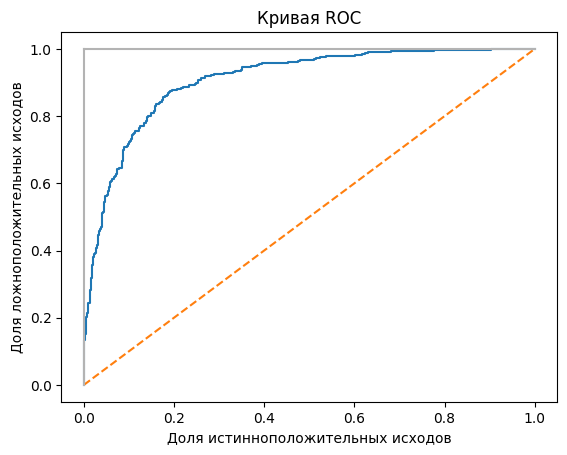

In [68]:
# Создать доли истинно- и ложноположительных исходов
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, target_probabilities)

# Построить график кривой ROC
plt.title("Кривая ROC")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls='--')
plt.plot([0,0], [1,0], c = "0.7")
plt.plot([1,1], c = "0.7")
plt.xlabel("Доля истинноположительных исходов")
plt.ylabel("Доля ложноположительных исходов")
plt.show()

In [70]:
# Площадь под графиком кривой
roc_auc_score(target_test, target_probabilities)

0.9073389355742297

## Оценивание предсказаний мультиклассового классификатора

Для мультиклассовых классификаторов можно использовать перекрестную проверку с оценочными метрическими показателями

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

features, target = make_classification(n_samples = 10000,
                                      n_features = 10,
                                      n_classes = 3,
                                       n_redundant=0,
                                      n_informative=3,
                                      random_state=1)

logit = LogisticRegression()

cross_val_score(logit, features, target, scoring="accuracy")

array([0.8255, 0.825 , 0.8235, 0.838 , 0.827 ])

In [80]:
cross_val_score(logit, features, target, scoring="f1_macro")

array([0.8254742 , 0.82459103, 0.82333559, 0.8379795 , 0.82639532])

## Визуализация результативности классификатора

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


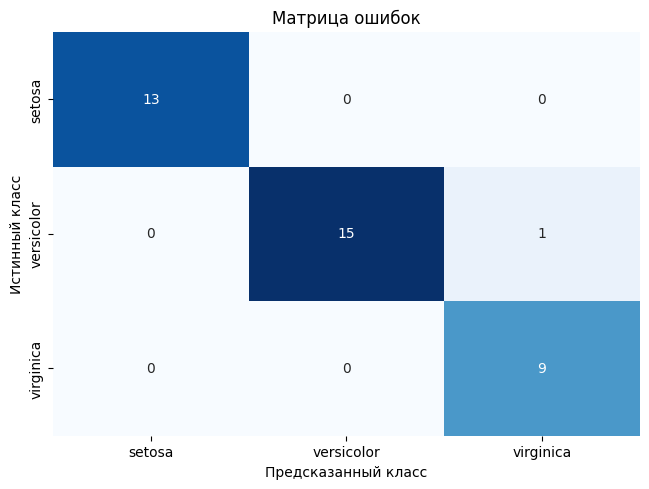

In [85]:
# Использовать матрицу ошибок, которая сравнивает предсказанные и истинные классы
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

iris = datasets.load_iris()

features = iris.data

target = iris.target

# Создать список имен целевых классов
class_names =iris.target_names

features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=1)

classifier = LogisticRegression()

target_predicted = classifier.fit(features_train, target_train).predict(features_test)

# Создать матрицу ошибок
matrix = confusion_matrix(target_test, target_predicted)

# СОздать фрейм данных пандас
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

# Создать тепловую карту
sns.heatmap(dataframe, annot=True,cbar=None, cmap="Blues")
plt.title("Матрица ошибок")
plt.tight_layout()
plt.ylabel("Истинный класс")
plt.xlabel("Предсказанный класс")
plt.show()


## Оценивание регрессионных моделей

Для оценки используется среднеквадратичная ошибка MSE

In [88]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

features, target = make_regression(n_samples=100,
                                  n_features =3,
                                  n_informative=3,
                                  n_targets=1,
                                  noise = 50,
                                  coef = False,
                                  random_state=1)
ols = LinearRegression()

# Перекрестно проверить линейную регрессию,
# используя отрицательный показатель MSE
cross_val_score(ols,features,target,scoring='neg_mean_squared_error')

array([-1974.65337976, -2004.54137625, -3935.19355723, -1060.04361386,
       -1598.74104702])

In [89]:
# Коэффициент детерминации R^2
cross_val_score(ols,features,target,scoring="r2")

array([0.8622399 , 0.85838075, 0.74723548, 0.91354743, 0.84469331])

## Оценивание кластеризующих моделей

In [96]:
# Оценка кластеризации с использованием силуэтных коэффициентов
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

features, target = make_blobs(n_samples=1000,
                             n_features=10,
                             centers =2,
                             cluster_std=0.5,
                             shuffle = True,
                             random_state = 1)

# Кластеризировать данные, используя алгоритм k средних, чтобы предсказать классы
model = KMeans(n_clusters=2,random_state=1).fit(features, target)

# Получить предсказанные данные
target_predicted = model.labels_

#Оценить модель
silhouette_score(features, target_predicted)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.8916265564072142

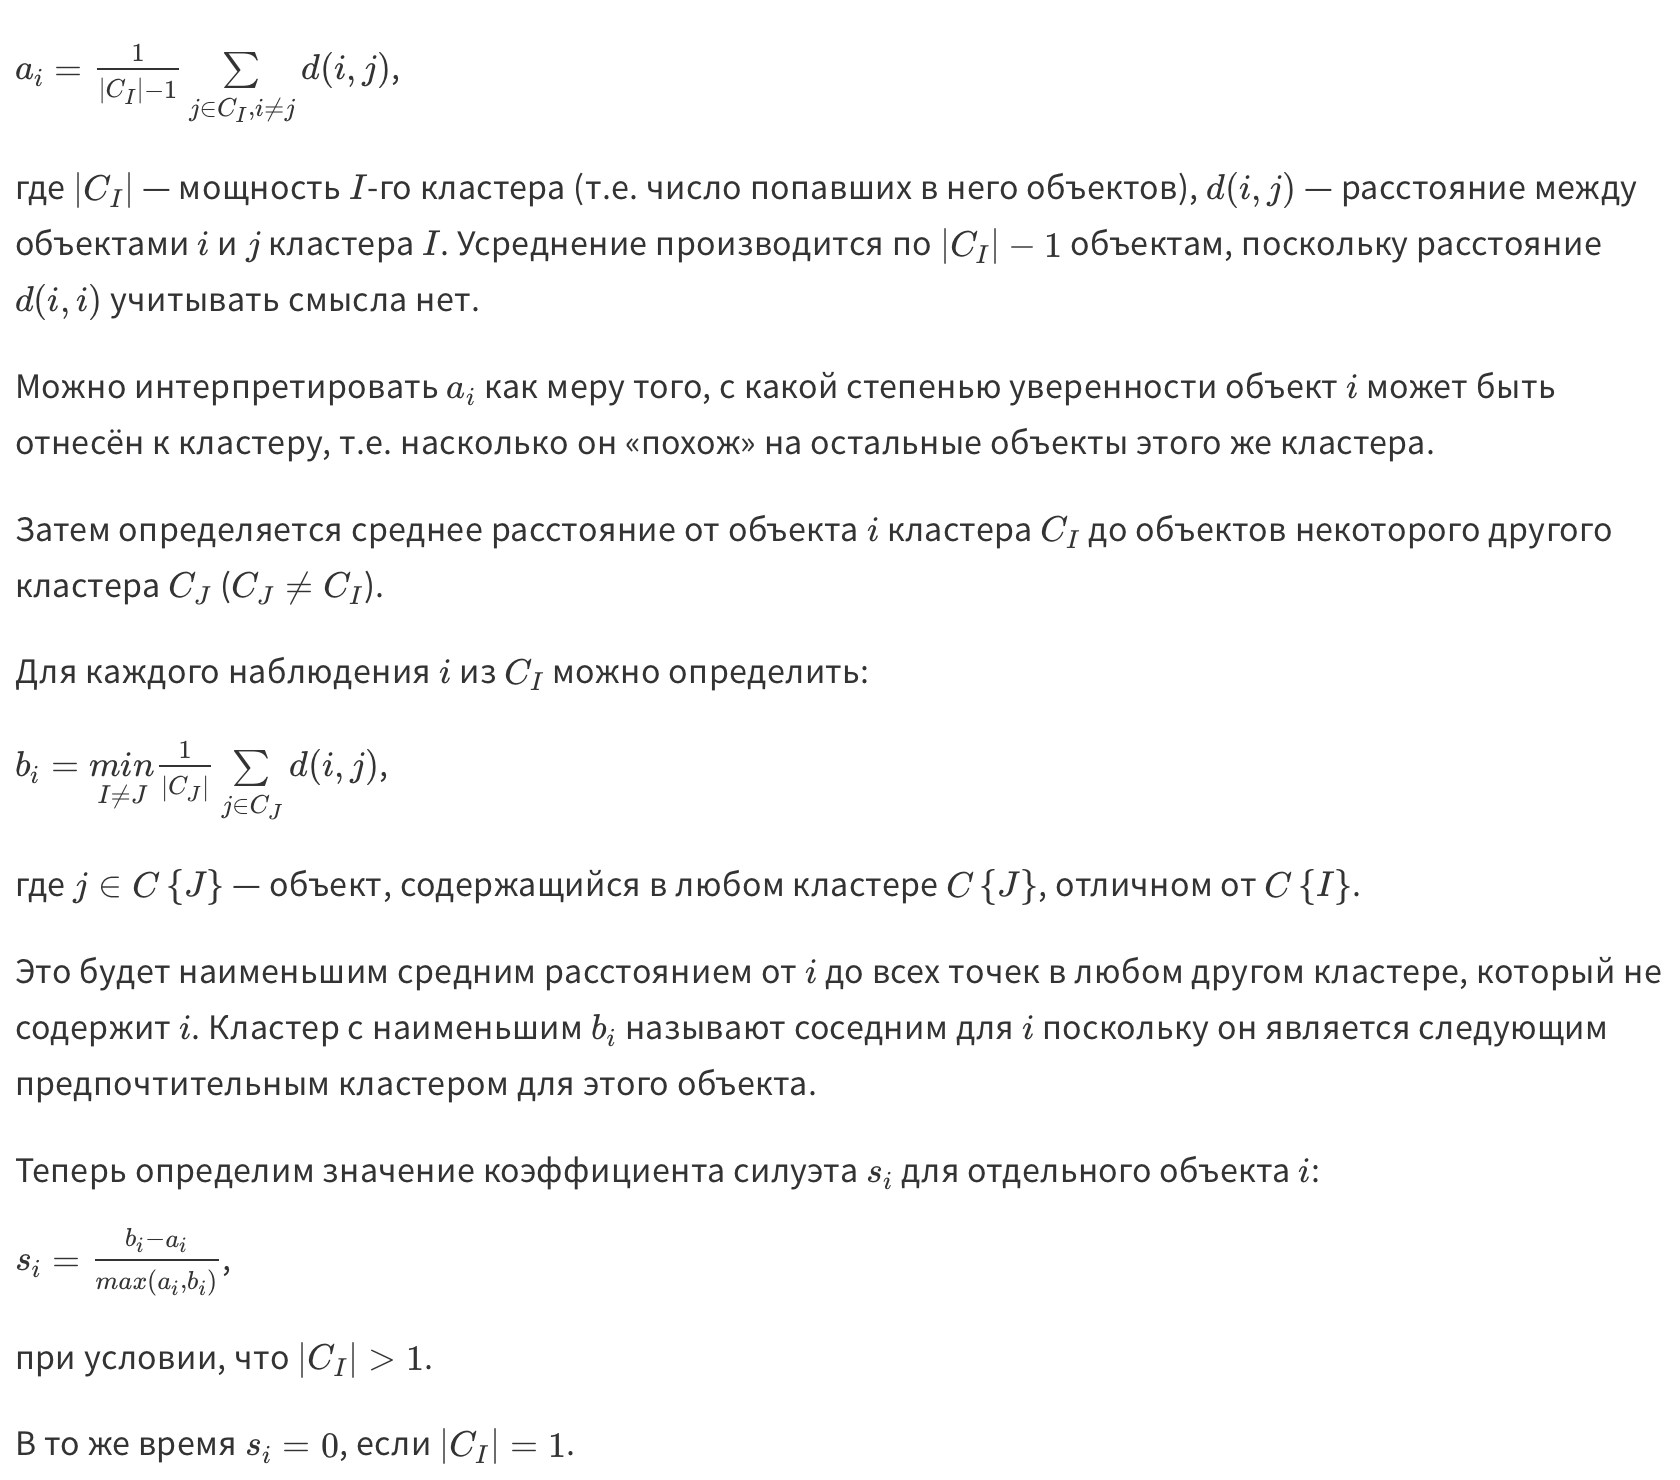

## Создание собственного оценочного показателя

In [106]:
# Создать собственную оценочную функцию
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

features, target = make_regression(n_samples=100,
                                  n_features=3,
                                  random_state =1)

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1,
                                                                           random_state=1)
# Создать собственный метрический показатель
def custom_metric(target_test, target_predicted):
    # Вычислить оценочный показатель r-квадрат
    r2 = r2_score(target_test, target_predicted)
    return r2

# Создать оценочную функцию и установить что чем выше оценки тем лучше
score = make_scorer(custom_metric, greater_is_better=True)

classifier = Ridge()

model = classifier.fit(features_train, target_train)

res= model.predict(features_test)

score(model, features_test, target_test)

0.9997906102882058

## Визуализация эффекта размера тренировочного набора

Требуется оценить эффект влияния количества наблюдений в тренировочном наборе на некоторый метрический показатель

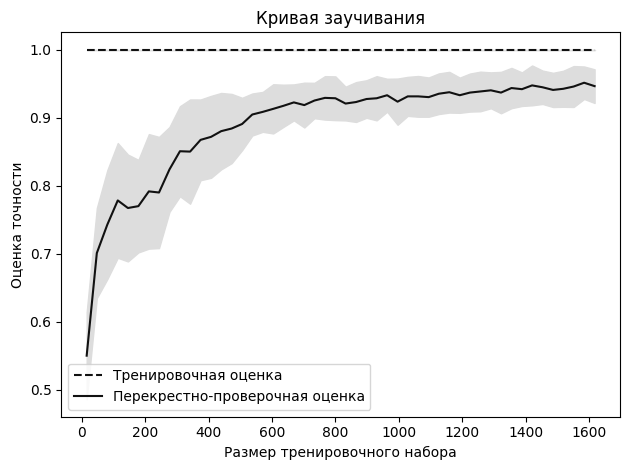

In [112]:
# Посторим кривую заучивания
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

digits = load_digits()

features, target = digits.data, digits.target

# Создать перекрестно-проверочные тренировочные и тестовые оценки
# для разных размеров тренировочного набора
train_size, train_score, test_score = learning_curve(RandomForestClassifier(),
                                                    features,
                                                    target,
                                                    cv=10, # Количество блоков
                                                    scoring="accuracy",
                                                    n_jobs=-1,
                                                    train_sizes=np.linspace(0.01,1.0,50))

#  Создать средние и стандартные отклонения оценок тренировочного набора
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)

# Создать средние и стандартные отклонения тестового набора
test_mean = np.mean(test_score, axis=1)
test_std = np.std(test_score, axis=1)

# Нанести линии
plt.plot(train_size, train_mean, "--", color = "#111111", label = "Тренировочная оценка")
plt.plot(train_size, test_mean, color = "#111111", label = "Перекрестно-проверочная оценка")

# Нанести полосы
plt.fill_between(train_size, train_mean - train_std,
                train_mean+train_std, color = "#DDDDDD")
plt.fill_between(train_size, test_mean - test_std,
                test_mean+test_std, color = "#DDDDDD")

# Построить график
plt.title("Кривая заучивания")
plt.xlabel("Размер тренировочного набора")
plt.ylabel("Оценка точности")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Создание текстового отчета об оценочных метрических показателях 

In [116]:
# Используем функцию classification_report
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

iris = datasets.load_iris()

features = iris.data

target = iris.target

# Создать список имен целевых классов
class_names = iris.target_names

features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=1)

classifier = LogisticRegression()

model = classifier.fit(features_train, target_train)

target_predicted = model.predict(features_test)

print(classification_report(target_test, target_predicted, target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Визуализация эффекта значений гиперпараметра  

In [ ]:
# Дописать